In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
import numpy as np
import cv2
from scipy.constants import h, c, k
from scipy import integrate
import pylab
import matplotlib as mpl

C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


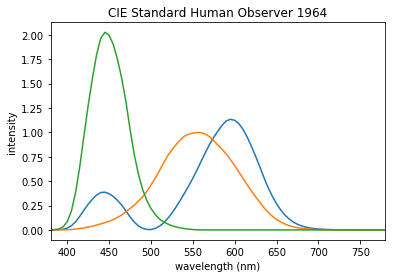

In [2]:
w,x,y,z = np.genfromtxt('cie1964.csv', delimiter=',', unpack=True)
plt.plot(w, x,
        w, y,
        w, z)
plt.xlim(380, 780)
plt.style.use('default')
plt.title('CIE Standard Human Observer 1964')
plt.xlabel('wavelength (nm)')
plt.ylabel('intensity')
plt.show()


In [3]:
def spec2xyz(spectrum, fbar):
    XYZ = []
    for i in range(len(fbar)):
        integrand = spectrum*fbar[i]
        if type(spectrum) not in [list, np.ndarray]:
            integral = integrand
        else:
            integral = integrate.trapz(integrand, spectrum)
        XYZ.append(integral)
    I = np.sum(XYZ)
    x = XYZ[0]/I
    y = XYZ[1]/I
    z = XYZ[2]/I
    return x, y, z

In [4]:
xbound, ybound = [], []
for i in range(len(w)):
    x1, y1, z1 = spec2xyz(w[i], [x[i], y[i], z[i]])
    xbound.append(x1)
    ybound.append(y1)

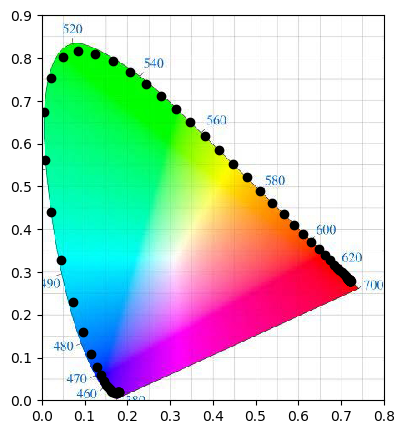

In [35]:
ciexy = mp.imread('cie.jpg')
mp.figure(figsize=(5, 5))
mp.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
mp.plot(xbound, ybound, 'ko', mew=1, mec='k')
plt.grid(0)
plt.show()

In [6]:
#Blackbody Radiation
def B(l, T):
    a = 2.0*h*c**2
    b = (h*c) / (l*k*T)
    pbr2 = a / ((l**5)*(np.exp(b) - 1.0))
    return pbr2

In [7]:
locusx, locusy = [], []
T = np.arange(1000, 10001, 1000)
for t in T:
    bl = B(w*1e-9, t)
    ba = np.trapz(bl, w*1e-9)
    b = (bl)/(ba)
    x, y, _ = spec2xyz(b,[x, y, z])
    locusx.append(x)
    locusy.append(y)

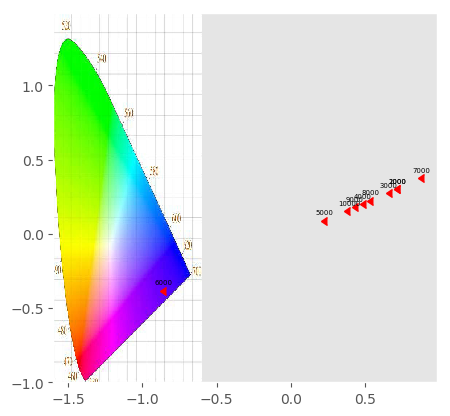

In [8]:
import matplotlib
plt.style.use('ggplot')
cie = cv2.imread('cie.jpg',)
plt.imshow(cie, extent=(-1.6,-0.6, -1.0, 1.49))
#plt.imshow(cie)
plt.plot(locusx, locusy, color='r', ls='None', marker=4)
for i, s in enumerate(T):
    plt.text(locusx[i]-0.04, locusy[i]+0.04, str(s), fontsize=5)
plt.grid(0)
plt.show()

TypeError: text() missing 1 required positional argument: 's'

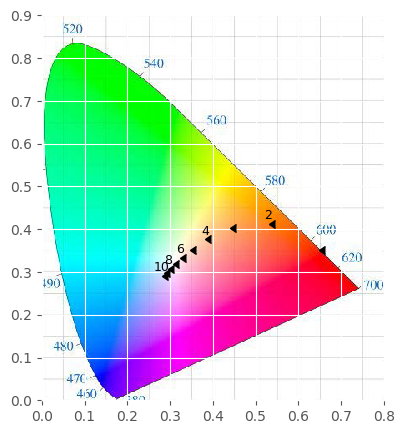

In [28]:
def spec2xyz(wavelength, spectrum, observer):
    XYZ = []
    for i in range(len(observer)):
        integrand = spectrum*observer[i]
        integral = integrate.trapz(integrand, wavelength)
        XYZ.append(integral)
    x, y, z = XYZ/np.sum(XYZ)
    return x, y

def B(l, T):
    c1 = 2*np.pi*h*c*c
    c2 = h*c/k
    return c1/l**5 * 1/(np.exp(c2/l/T) - 1)

def ShoelaceArea(x, y):
    return 1/2 * abs(x@np.roll(y, 1) - y@np.roll(x, 1))

wavelength, xbar, ybar, zbar = np.genfromtxt('cie1964.csv', delimiter=',', unpack=True)

boundx, boundy = [], []
for w in range(380, 781, 10):
    ddelta = np.zeros_like(wavelength)
    ddelta[np.where(wavelength == w)[0]] = 1
    x, y = spec2xyz(wavelength, ddelta, [xbar, ybar, zbar])
    boundx.append(x)
    boundy.append(y)
    
locusx, locusy = [], []
T = np.arange(1000, 10001, 1000)
for t in T:
    bl = B(wavelength * 1e-9, t)
    ba = integrate.trapz(bl, wavelength*1e-9)
    b = bl/ba
    x, y = spec2xyz(wavelength, b, [xbar, ybar, zbar])
    locusx.append(x)
    locusy.append(y)
    
ciexy = mp.imread('cie.jpg')
mp.figure(figsize=(5, 5))
mp.imshow(ciexy, extent=(0.0, 0.8, 0.0, 0.9))
plt.plot(locusx, locusy, color='k', ls='None', marker=4)
for i, s in enumerate(T):
    if i%2 == 0:
        continue
    mp.text(locusx[i], locusy[i]+0.02, 
            str(s//1000), 
            fontsize=9, 
            color='k', 
            horizontalalignment='center',
            verticalalignment='center')
mp.text(0.3, 0.425, 
        horizontalalignment='center',
        verticalalignment='center')
mp.savefig('locus.png', dpi=300, bbox_inches='tight')
mp.show()
